In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("crypto_hourly_technical_features.csv")

# Create binary target variable
df['target'] = (df['close'] > df['open']).astype(int)

# Drop columns not used for modeling
drop_cols = ['id', 'symbol', 'name', 'datetime', 'open', 'high', 'low', 'close', 'target']
features = df.drop(columns=drop_cols, errors='ignore')
target = df['target']

# Drop missing values
features = features.dropna()
target = target.loc[features.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [3]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
logreg_preds = logreg.predict(X_test_scaled)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, logreg_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, logreg_preds))
print(classification_report(y_test, logreg_preds))

Logistic Regression
Accuracy: 0.8194304986998275
Confusion Matrix:
 [[40954  4593]
 [ 9434 22701]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85     45547
           1       0.83      0.71      0.76     32135

    accuracy                           0.82     77682
   macro avg       0.82      0.80      0.81     77682
weighted avg       0.82      0.82      0.82     77682



### Linear SVM

In [12]:
linear_svm = LinearSVC(max_iter=10000)
linear_svm.fit(X_train_scaled, y_train)
linear_preds = linear_svm.predict(X_test_scaled)

print("Linear SVM")
print("Accuracy:", accuracy_score(y_test, linear_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, linear_preds))
print(classification_report(y_test, linear_preds))

/Users/stephaniezhou/anaconda3/envs/tc_env/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/stephaniezhou/anaconda3/envs/tc_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM
Accuracy: 0.7975592801421179
Confusion Matrix:
 [[40680  4867]
 [10859 21276]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84     45547
           1       0.81      0.66      0.73     32135

    accuracy                           0.80     77682
   macro avg       0.80      0.78      0.78     77682
weighted avg       0.80      0.80      0.79     77682



### RBF SVM

In [4]:
sample_size = 50000
X_train_small = X_train_scaled[:sample_size]
y_train_small = y_train[:sample_size]

rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train_small, y_train_small)
rbf_preds = rbf_svm.predict(X_test_scaled)

print("RBF SVM")
print("Accuracy:", accuracy_score(y_test, rbf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rbf_preds))
print(classification_report(y_test, rbf_preds))

RBF SVM
Accuracy: 0.8592080533456914
Confusion Matrix:
 [[41740  3807]
 [ 7130 25005]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     45547
           1       0.87      0.78      0.82     32135

    accuracy                           0.86     77682
   macro avg       0.86      0.85      0.85     77682
weighted avg       0.86      0.86      0.86     77682



### Feature Importance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("crypto_hourly_technical_features.csv")

In [3]:
# Create binary target
df['target'] = (df['close'] > df['open']).astype(int)

# Feature columns (exclude metadata + price columns)
drop_cols = ['id', 'symbol', 'name', 'datetime', 'open', 'high', 'low', 'close', 'target']
features = df.drop(columns=drop_cols, errors='ignore')
target = df['target']

In [4]:
# Drop missing values
features = features.dropna()
target = target.loc[features.index]


In [5]:
# Split and scale
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [7]:
# Feature importance
coef = logreg.coef_[0]
feature_names = features.columns
importance = pd.Series(np.abs(coef), index=feature_names).sort_values(ascending=False)

In [8]:
# Print out the top features
print("\nTop 10 Most Important Features:\n")
print(importance.head(10))


Top 10 Most Important Features:

log_return       31.459309
hourly_return    13.133407
return_lag_1     13.133407
ewma_0.9          6.708408
sma_3h            4.599405
sum_ret_3         2.750697
ma_5              1.720229
return_lag_3      1.523959
return_lag_2      1.369919
sum_ret_5         1.348813
dtype: float64


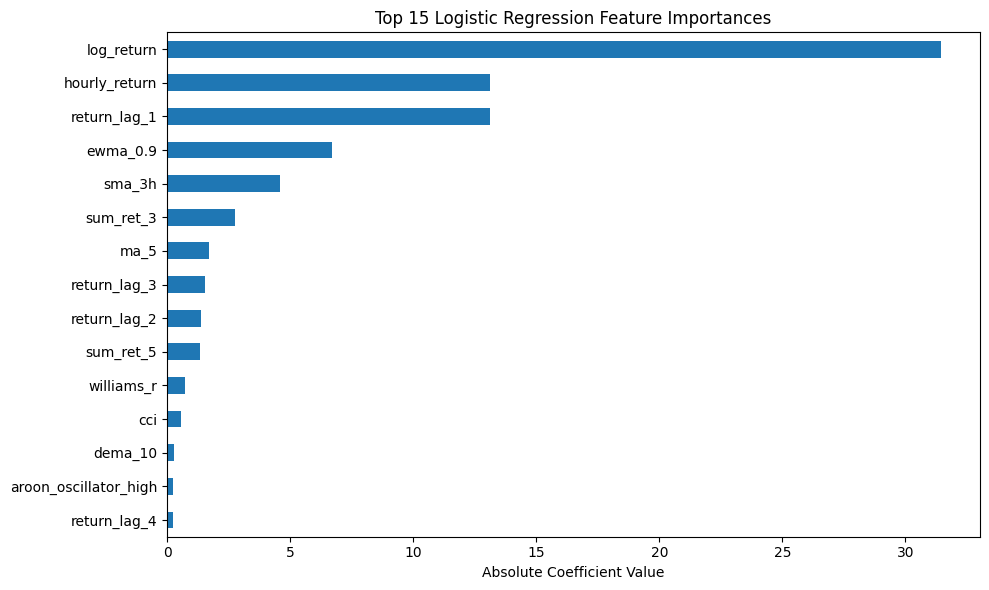

In [9]:
# Plot
plt.figure(figsize=(10, 6))
importance.head(15).plot(kind='barh')
plt.title("Top 15 Logistic Regression Feature Importances")
plt.xlabel("Absolute Coefficient Value")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()